In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import random #used for select random number
from sklearn import metrics #used for measure classification performance
from sklearn.datasets import load_iris #used for load iris dataset
from sklearn.model_selection import train_test_split #used for split our dataset train-test (75% - 25%)
from sklearn.ensemble import RandomForestClassifier #used for a random forest classifier
from sklearn.preprocessing import StandardScaler #used for standardize features by removing the mean and scaling to unit variance.
from sklearn.metrics import confusion_matrix #used for compute confusion matrix to evaluate the accuracy of a classification
from sklearn.tree import export_graphviz #used for export a decision tree in DOT format.
from sklearn.tree import plot_tree #used for plot a decision tree
from sklearn import tree

load_iris() function load iris dataset and creating pd dataframe
after loading the dataset we create the pd dataframe
not required, but the iris dataset is a series form when first loaded. Converting it to dataframe provides ease of operation

In [2]:
iris = load_iris() #load iris dataset and creating pd dataframe
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)
target_df = pd.DataFrame(data= iris.target, columns= ['species'])
def converter(specie):
    if specie == 0:
        return 'setosa'
    elif specie == 1:
        return 'versicolor'
    else:
        return 'virginica'
target_df['species'] = target_df['species'].apply(converter) 
iris_df = pd.concat([iris_df, target_df], axis= 1) #concatenate the DataFrames

In [3]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


QUESTION-1

We first convert the iris flower species, which are setosa, versicolor and virginica, into a numerical form as 0,1,2, respectively. Then, in order to divide the dataset into train and test, we divide the dataset into datasets that contain only the features of the flower and only show the species of flower. After defining our variables in this way, we divide the dataset with a ratio of 75 to 25 using the train_test_split function of the sklearn library.

In [5]:
# Converting Objects to Numerical dtype
iris_df.drop('species', axis= 1, inplace= True)
target_df = pd.DataFrame(columns= ['species'], data= iris.target)
iris_df = pd.concat([iris_df, target_df], axis= 1)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
#randomizing dataframe
iris_df = iris_df.sample(frac = 1)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
48,5.3,3.7,1.5,0.2,0
83,6.0,2.7,5.1,1.6,1
137,6.4,3.1,5.5,1.8,2
135,7.7,3.0,6.1,2.3,2
59,5.2,2.7,3.9,1.4,1
...,...,...,...,...,...
38,4.4,3.0,1.3,0.2,0
132,6.4,2.8,5.6,2.2,2
70,5.9,3.2,4.8,1.8,1
109,7.2,3.6,6.1,2.5,2


In [7]:
#variables
x = iris_df.drop(columns="species")
y = iris_df["species"]
feature_names = x.columns
labels = y.unique()

In [8]:
#splitting the dataset 
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.25)
#for checking
print("Shape X:",x.shape,
      "\nShape X_train:",X_train.shape,
      "\nShape X_test:",X_test.shape,
      "\n\nShape Y:",y.shape,
      "\nShape Y_train:",Y_train.shape,
      "\nShape Y_test:",Y_test.shape)

Shape X: (150, 4) 
Shape X_train: (112, 4) 
Shape X_test: (38, 4) 

Shape Y: (150,) 
Shape Y_train: (112,) 
Shape Y_test: (38,)


In [9]:
#feature scaling     
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. An random forest can be created using the RandomForestClassifier() function. The n_estimators parameter determines the number of trees in the forest, and the criterion prameter determines the function to measure the quality of a split. 

In [10]:
#create a random forest classifier
clf=RandomForestClassifier(n_estimators=10, criterion="gini")

#training the model on the training dataset
clf.fit(X_train,Y_train)

#predicting the test set result  
y_pred=clf.predict(X_test)

#model accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.8947368421052632


QUESTION-2

The confusion matrix is used to evaluate the accuracy of a classification. And also accuracy, precision, recall and f1 score calculations are also calculated and used to test the performance of the model. 

In multilabel classification, accuracy function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true. 

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. 

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal.

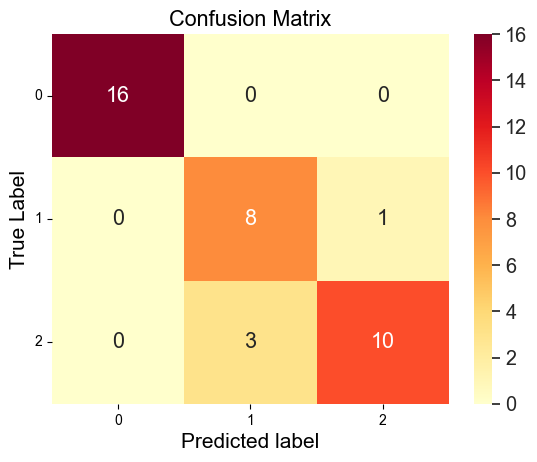

<Figure size 1000x700 with 0 Axes>

In [11]:
#Creating the Confusion matrix  
cm = metrics.confusion_matrix(Y_test, y_pred)
matrix_df = pd.DataFrame(cm)
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="YlOrRd")
ax.set_title('Confusion Matrix')
ax.set_xlabel("Predicted label", fontsize = 15)
ax.set_xticklabels(list(labels))
ax.set_ylabel("True Label", fontsize = 15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

In [12]:
#Accuracry 
metrics.accuracy_score(Y_test, y_pred)

0.8947368421052632

In [13]:
#Precision 
#The best value is 1 and the worst value is 0
precision = metrics.precision_score(Y_test,y_pred, average=None)
precision_results = pd.DataFrame(precision, index=labels)
precision_results.rename(columns={0:'precision'}, inplace =True)
precision_results

,precision
0,1.000000
1,0.727273
2,0.909091


In [14]:
#Recall
#The best value is 1 and the worst value is 0
recall = metrics.recall_score(Y_test, y_pred, average =None)
recall_results = pd.DataFrame(recall, index= labels)
recall_results.rename(columns ={0:'Recall'}, inplace =True)
recall_results

,Recall
0,1.000000
1,0.888889
2,0.769231


In [15]:
#F-1 score
#F1 = 2 * (precision * recall) / (precision + recall)
f1 = metrics.f1_score(Y_test, y_pred, average=None)
f1_results = pd.DataFrame(f1, index=labels)
f1_results.rename(columns={0:'f1'}, inplace=True)
f1_results

,f1
0,1.000000
1,0.800000
2,0.833333


In [16]:
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.73      0.89      0.80         9
           2       0.91      0.77      0.83        13

    accuracy                           0.89        38
   macro avg       0.88      0.89      0.88        38
weighted avg       0.90      0.89      0.90        38



QUESTION-3

Since a random forest classifier consists of multiple decision trees, each decision tree in this model can be visualized separately. The clf.estimators_[index] attribute allows us to access the decision tree with the index value.

4


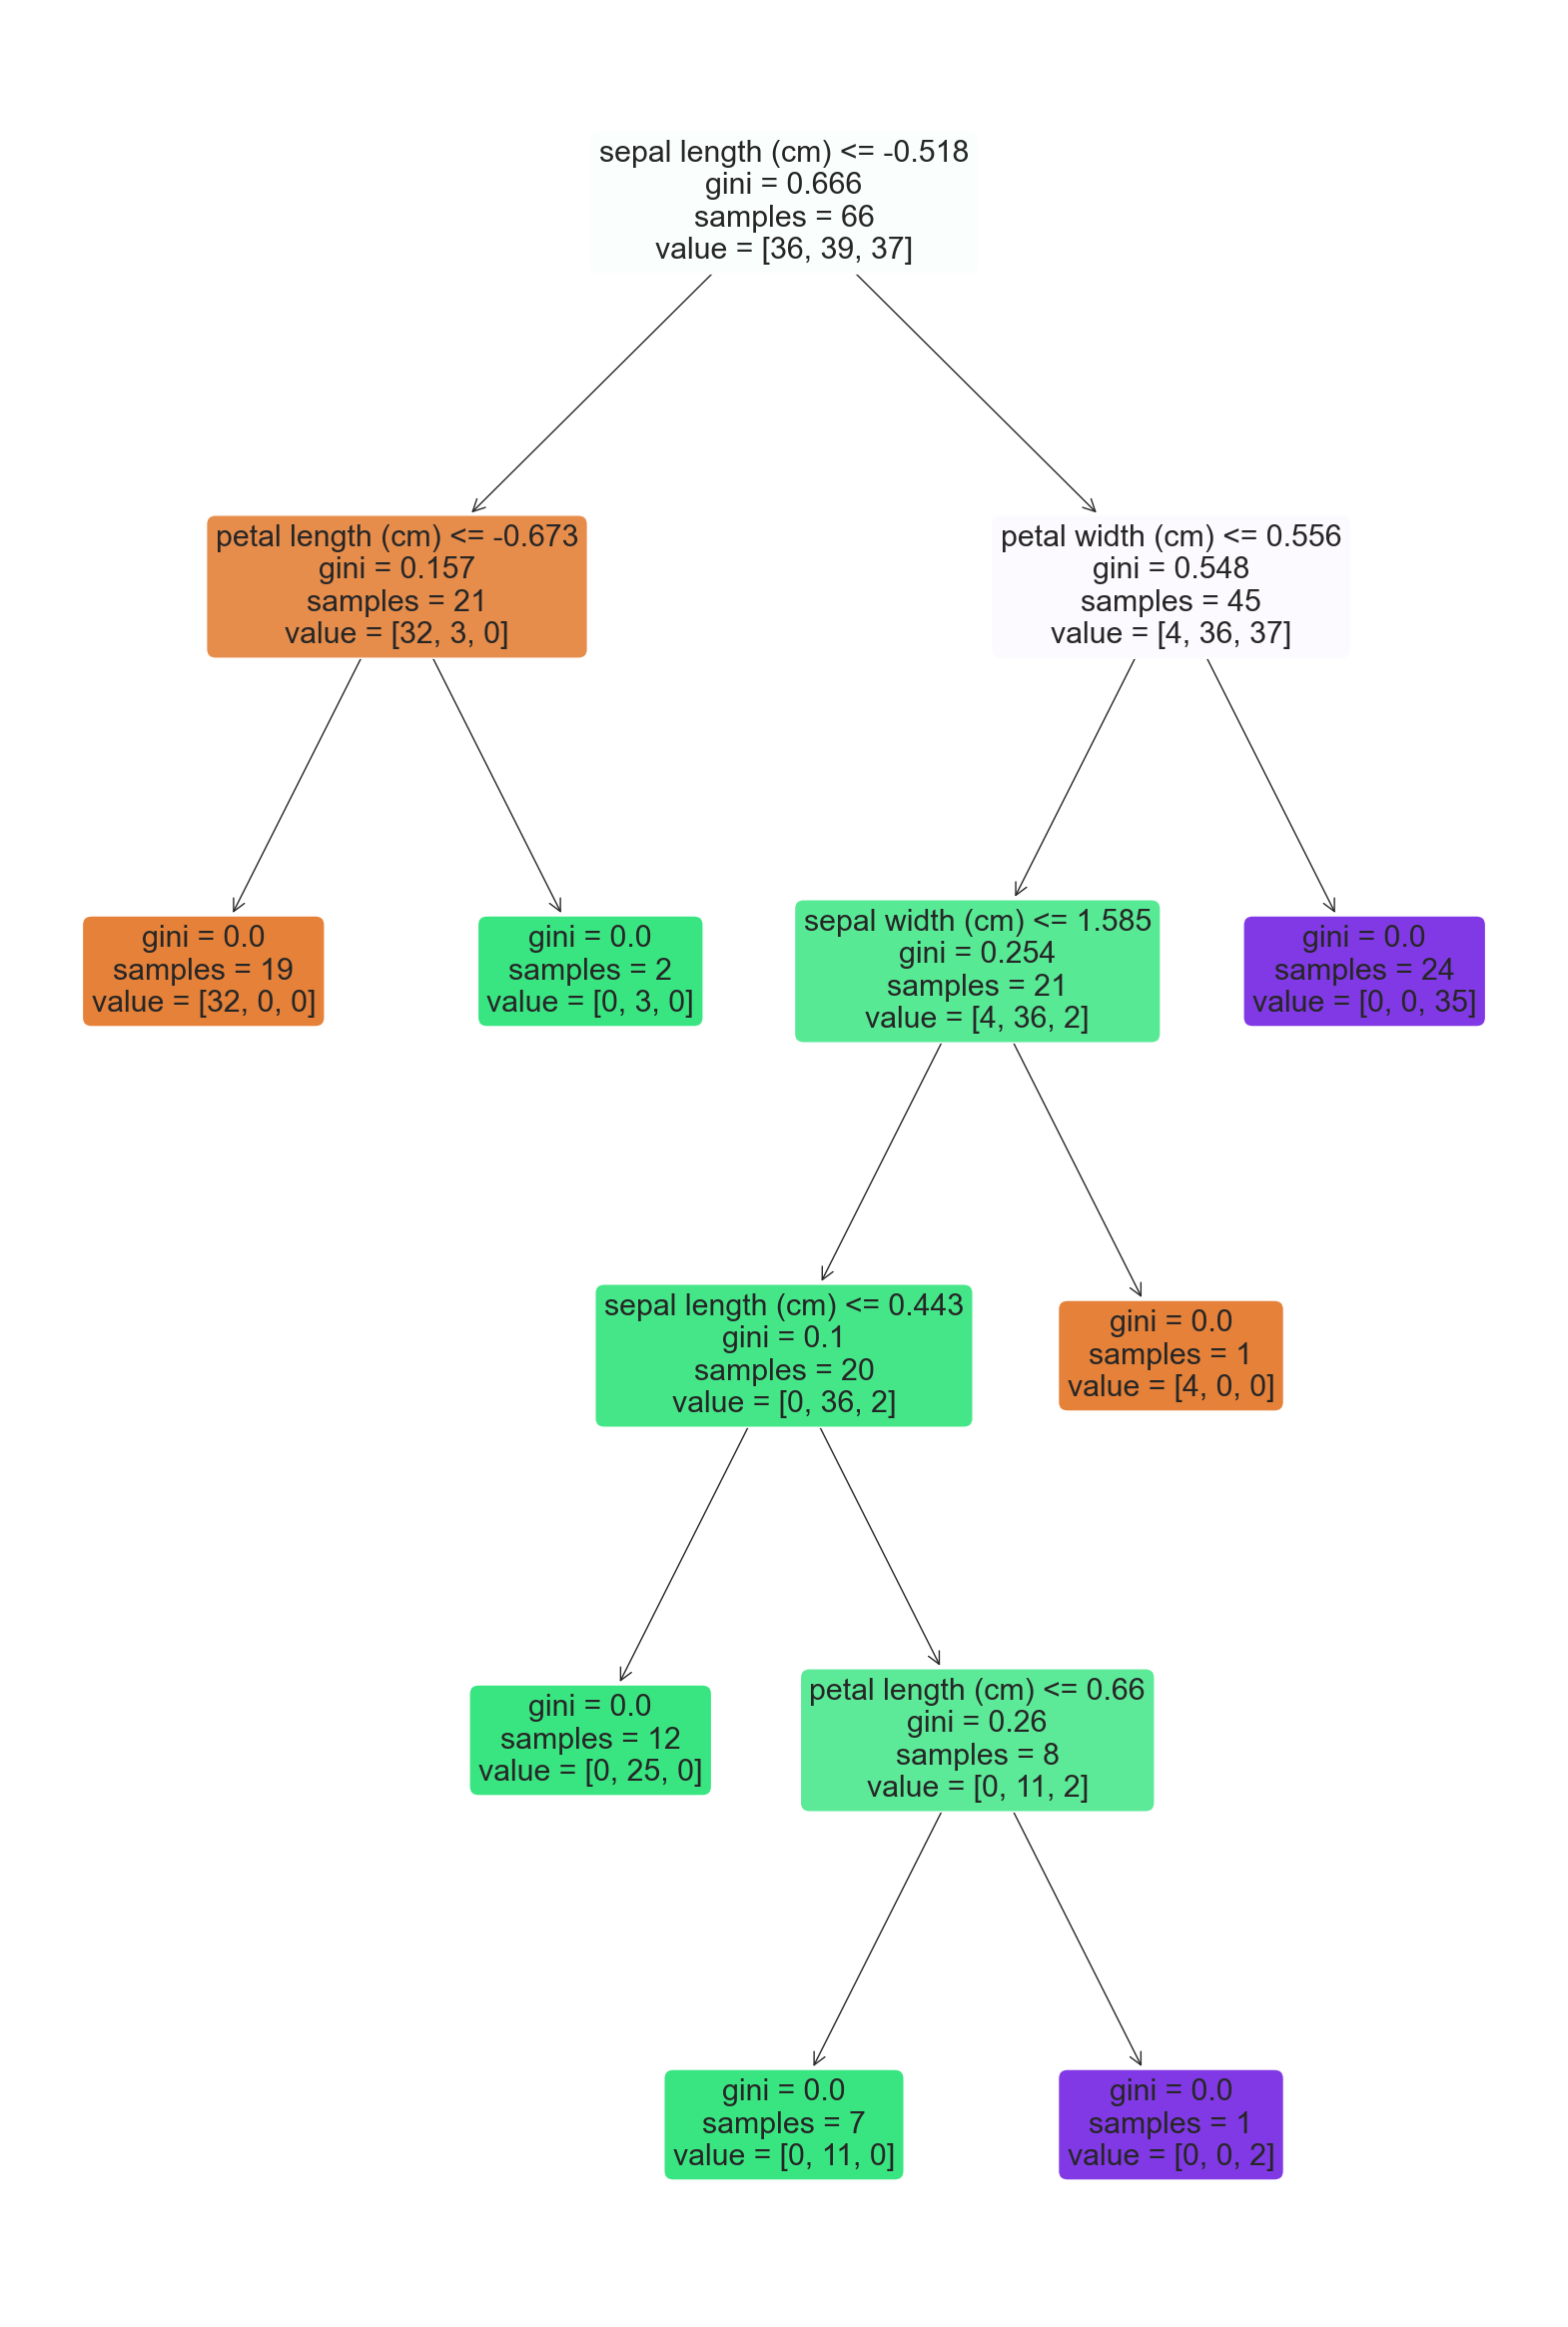

In [17]:
#using plotly library
rnd=random.randrange(0, 9, 1)
fig = plt.figure(figsize=(20, 30))
fig= tree.plot_tree(clf.estimators_[rnd], 
          feature_names=feature_names, 
          filled=True, impurity=True, 
          rounded=True)
print(rnd)

4


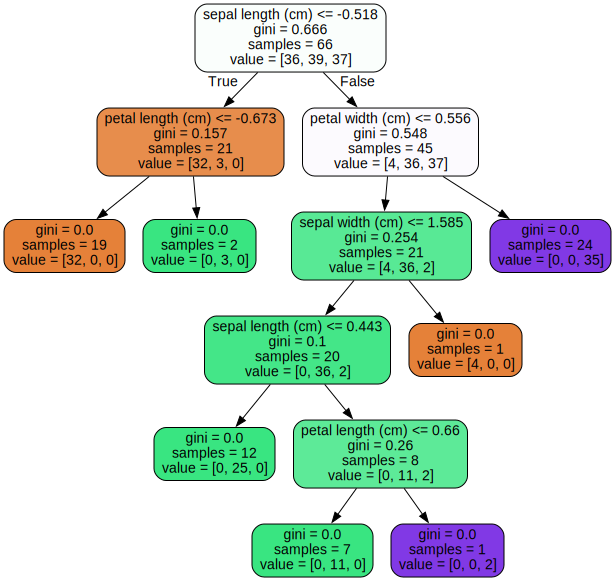

In [21]:
#using graphviz library
print(rnd)
dot_data = export_graphviz(clf.estimators_[rnd], 
                           feature_names=feature_names, 
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph